### Sales Forecasting and Product Trend Analysis For Dropshipping stores 

**Submitted by** : Fathimath Farshana k k 

**Domain**: E-Commerce & Dropshipping  
**Focus Areas**: Revenue Forecasting | Trend Analysis | Customer Behavior  
**Dataset**: Online Retail II  
**Tools Used**: Python, Pandas, Matplotlib, Seaborn,prophet.

###  Project Objective

To analyze historical retail data to uncover revenue trends, identify top-selling products, and forecast future sales — supporting inventory planning, marketing, and business growth in dropshipping environments.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##   Data Loading  

In [3]:
df = pd.read_excel(r"C:/Users/farsh/Downloads/online+retail+ii/online_retail_II.xlsx")

##  Data Cleaning & Feature Engineering  

In [6]:
print(df.head())
print(df.shape)
print(df.columns)
print(df.isnull().sum())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
(525461, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
Invoice             0
StockCode           0
Description      2928
Qua

In [ ]:
df = df.dropna(subset=['Customer ID'])

In [10]:
df = df.drop_duplicates()

In [28]:
df = df.copy()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [30]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 518596 entries, 0 to 525460
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      518596 non-null  object        
 1   StockCode    518596 non-null  object        
 2   Description  515668 non-null  object        
 3   Quantity     518596 non-null  int64         
 4   InvoiceDate  518596 non-null  datetime64[ns]
 5   Price        518596 non-null  float64       
 6   Customer ID  410763 non-null  float64       
 7   Country      518596 non-null  object        
 8   YearMonth    518596 non-null  object        
 9   Year         518596 non-null  int32         
 10  Month        518596 non-null  int32         
 11  Day          518596 non-null  int32         
 12  Weekday      518596 non-null  int32         
 13  Hour         518596 non-null  int32         
 14  IsReturn     518596 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(

In [32]:
df = df.copy()
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.weekday
df['Hour'] = df['InvoiceDate'].dt.hour
df['IsReturn'] = df['Invoice'].astype(str).str.startswith('C')

In [34]:
df['Revenue'] = df['Quantity'] * df['Price']

In [36]:
Q1 = df[['Quantity', 'Price', 'Revenue']].quantile(0.25)
Q3 = df[['Quantity', 'Price', 'Revenue']].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~(
    (df[['Quantity', 'Price', 'Revenue']] < (Q1 - 1.5 * IQR)) |
    (df[['Quantity', 'Price', 'Revenue']] > (Q3 + 1.5 * IQR))
).any(axis=1)]
print(f"Original shape: {df.shape}")
print(f"Shape after outlier removal: {df_clean.shape}")

Original shape: (518596, 16)
Shape after outlier removal: (413162, 16)


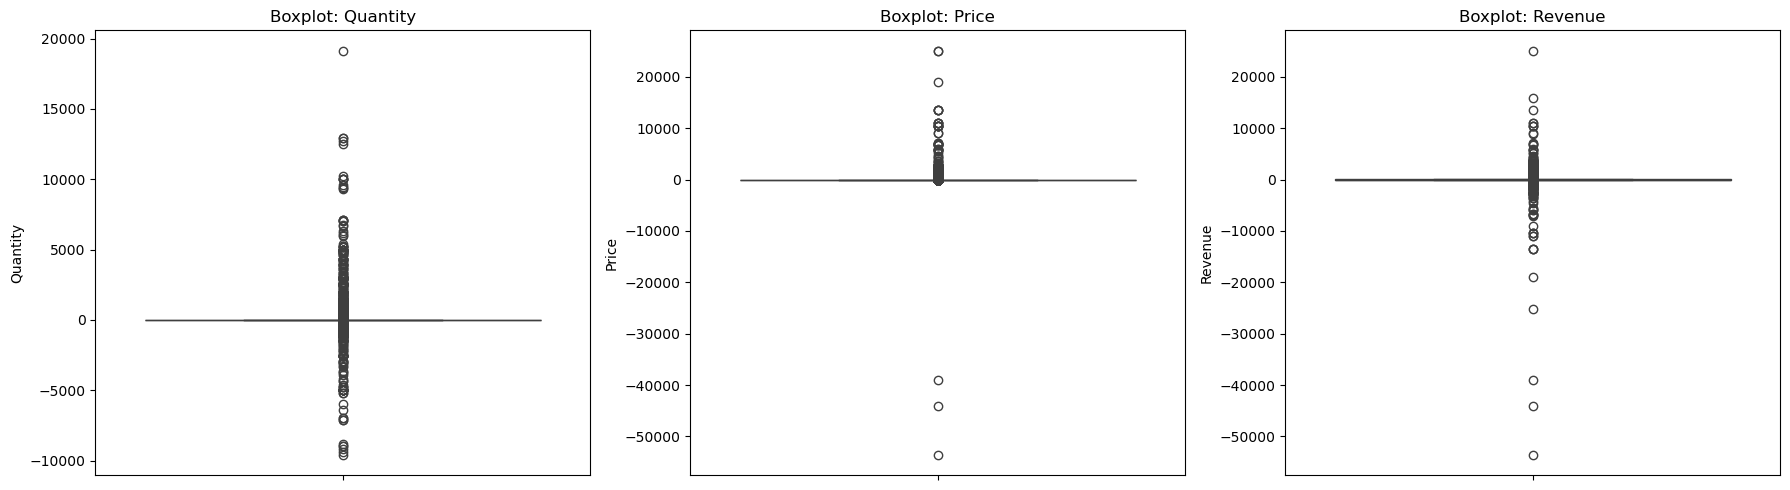

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df['Quantity'], ax=axes[0])
axes[0].set_title('Boxplot: Quantity')

sns.boxplot(y=df['Price'], ax=axes[1])
axes[1].set_title('Boxplot: Price')

sns.boxplot(y=df['Revenue'], ax=axes[2])
axes[2].set_title('Boxplot: Revenue')

plt.tight_layout()
plt.show()

In [40]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country YearMonth  Year  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom   2009-12  2009   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom   2009-12  2009   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom   2009-12  2009   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom   2009-12  2009   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom   2009-12  2009   

   Month  Day  Weekday  Hour  IsReturn  Revenue  
0     12    1        1     7     False     83.4  
1     12    1   

In [42]:
df.to_csv("cleaned_online_retail_II.csv", index=False)

In [43]:
sns.set(style="whitegrid")

## Top-Selling Products

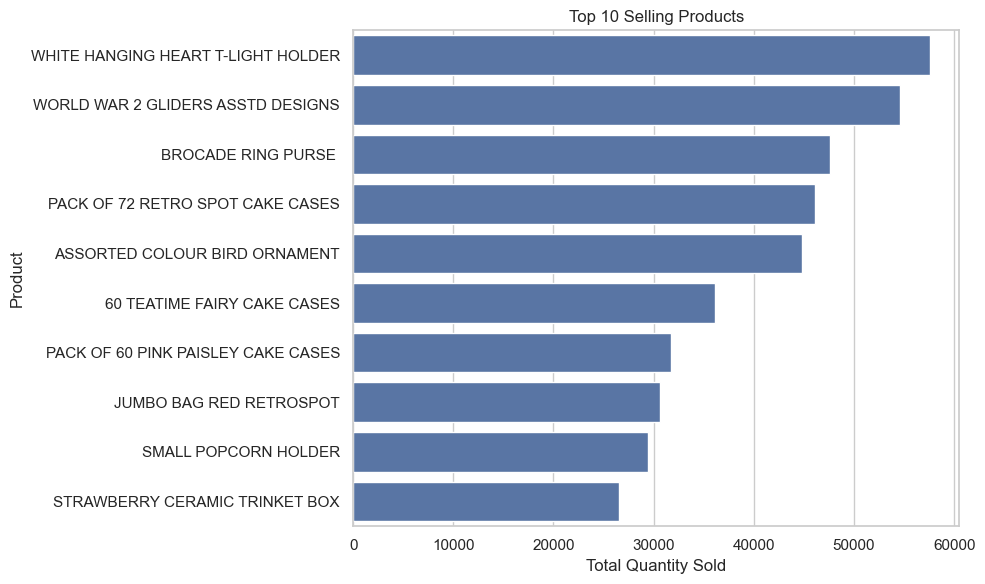

In [47]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

## Monthly Revenue Trend

In [51]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum().reset_index()

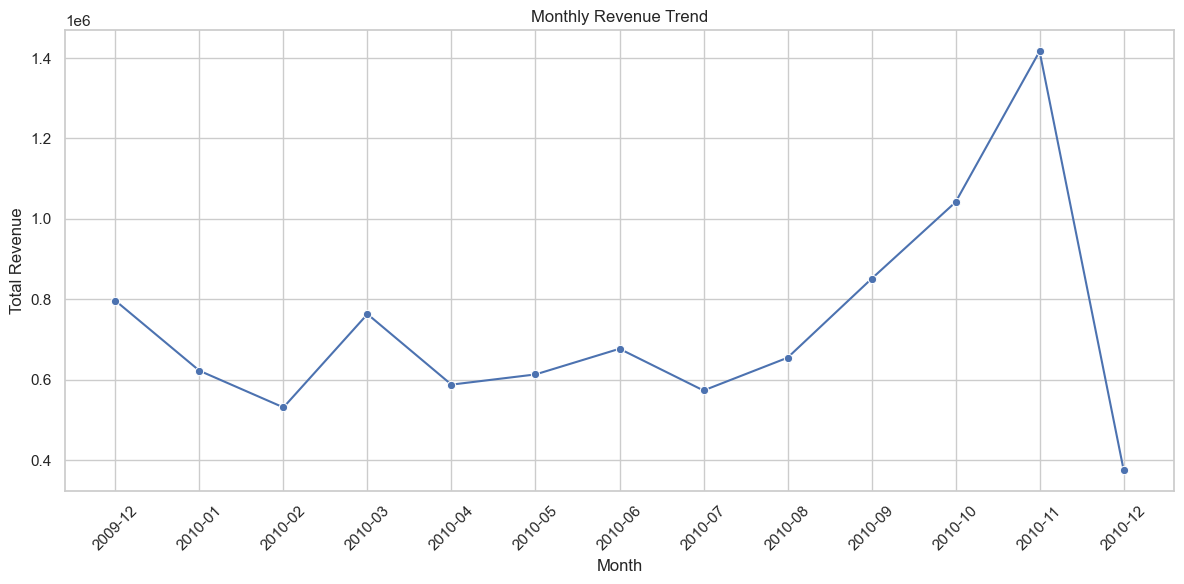

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 Countries by Revenue

In [59]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()

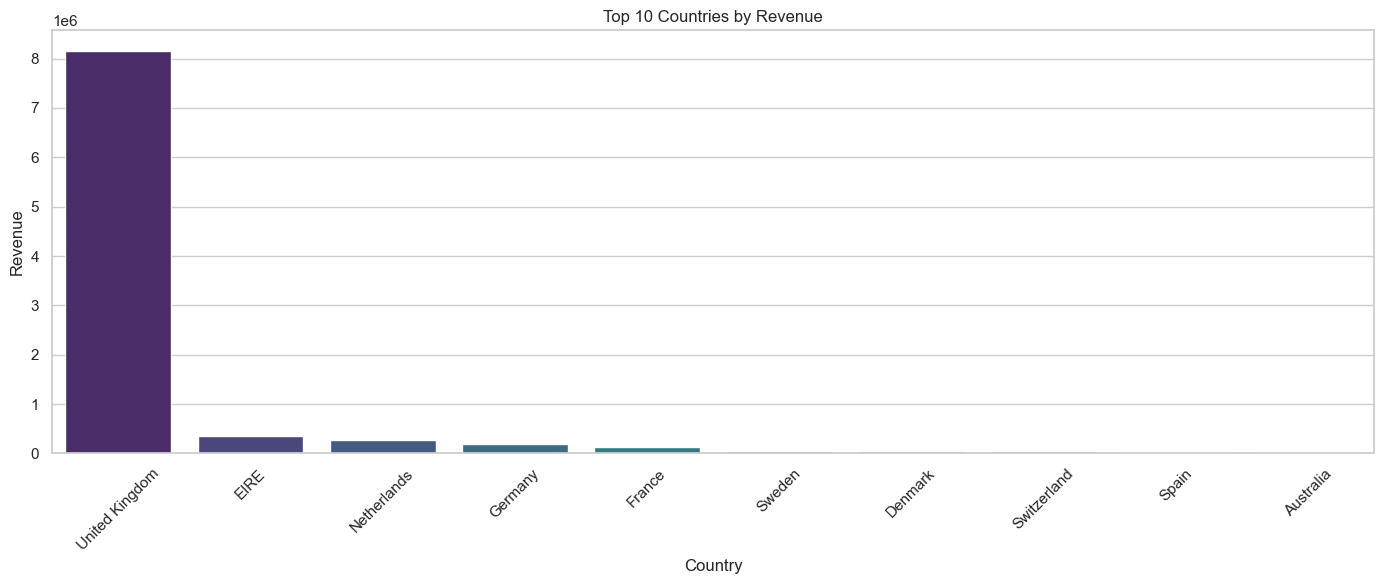

In [63]:
plt.figure(figsize=(14,6))
sns.barplot(data=country_revenue.head(10), x='Country', y='Revenue', hue='Country', palette='viridis', legend=False)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Returns vs. Purchases Analysis

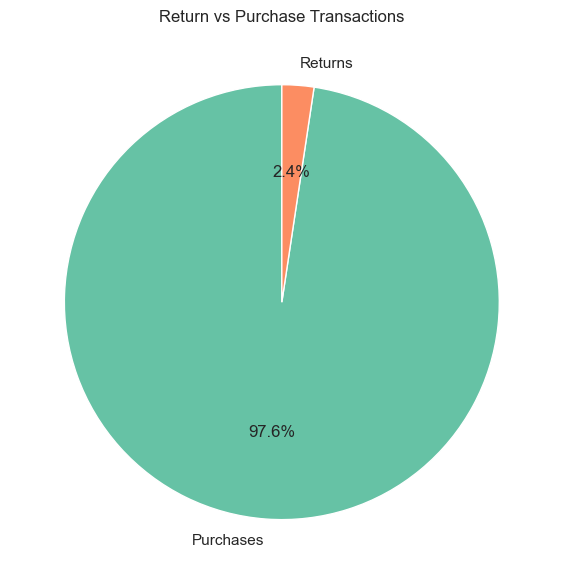

Total revenue lost to returns: -629808.65


In [66]:
df.loc[:, 'IsReturn'] = df['Quantity'] < 0
return_counts = df['IsReturn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    return_counts,
    labels=['Purchases', 'Returns'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66c2a5','#fc8d62']
)
plt.title('Return vs Purchase Transactions')
plt.tight_layout()
plt.show()

returns_df = df[df['IsReturn'] == True].copy()
returns_df.loc[:, 'ReturnRevenue'] = returns_df['Quantity'] * returns_df['Price']
total_return_revenue = returns_df['ReturnRevenue'].sum()
print(f"Total revenue lost to returns: {total_return_revenue:.2f}")


## Hourly Revenue Analysis

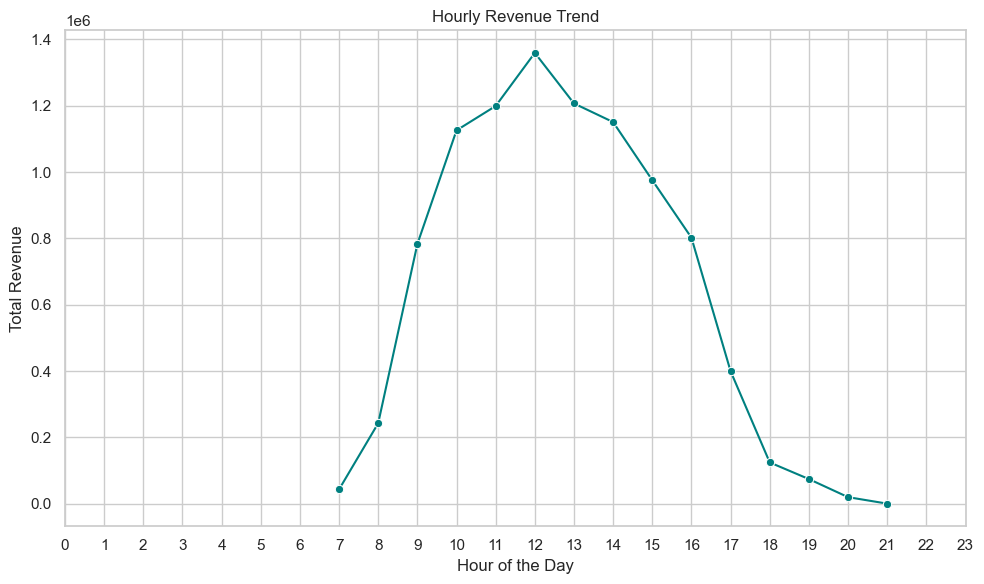

In [73]:
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_revenue = df.groupby('Hour')['Revenue'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_revenue, x='Hour', y='Revenue', marker='o', color='teal')
plt.title('Hourly Revenue Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Day of Week Revenue Analysis
# Mapping weekdays for clear labels

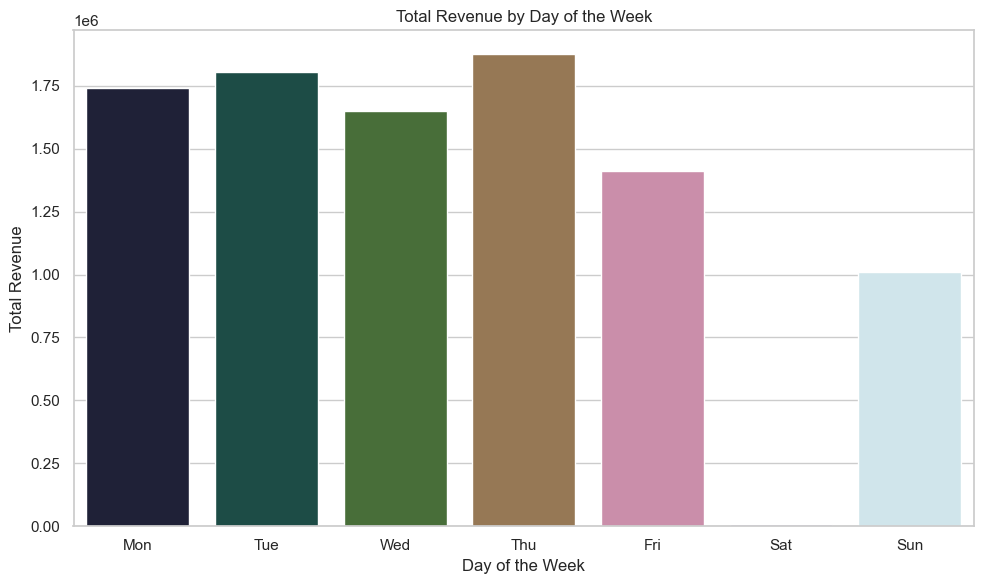

In [75]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
weekday_map = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}
df['DayName'] = df['DayOfWeek'].map(weekday_map)
day_revenue = df.groupby('DayName')['Revenue'].sum().reindex(
    ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    data=day_revenue,
    x='DayName',
    y='Revenue',
    hue='DayName',
    palette='cubehelix',
    legend=False
)
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

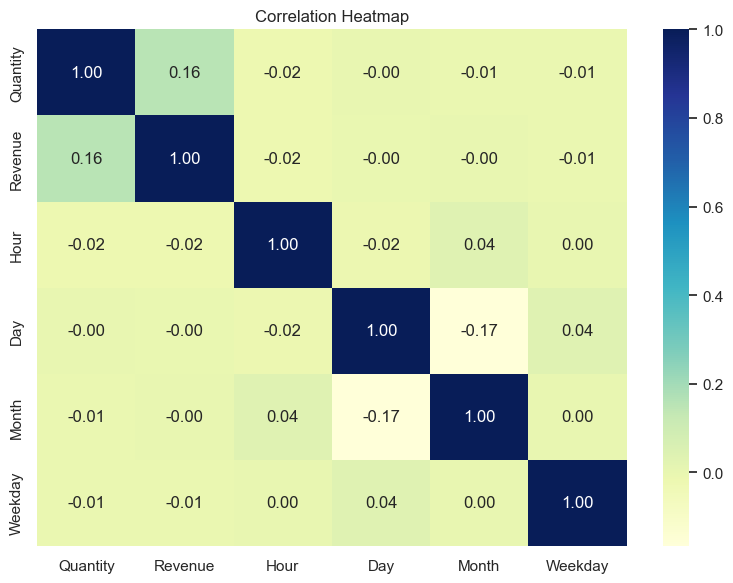

In [79]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Weekday'] = df['InvoiceDate'].dt.weekday  # 0 = Monday

corr_matrix = df[['Quantity', 'Revenue', 'Hour', 'Day', 'Month', 'Weekday']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Model Building and Forecasting with Prophet

In this section, we use Facebook Prophet to forecast monthly revenue for the dropshipping store, enabling data-driven inventory and marketing planning.


## Monthly Sales Forecasting using Prophet

In [83]:
!pip install prophet

22:37:11 - cmdstanpy - INFO - Chain [1] start processing
22:37:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\farsh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


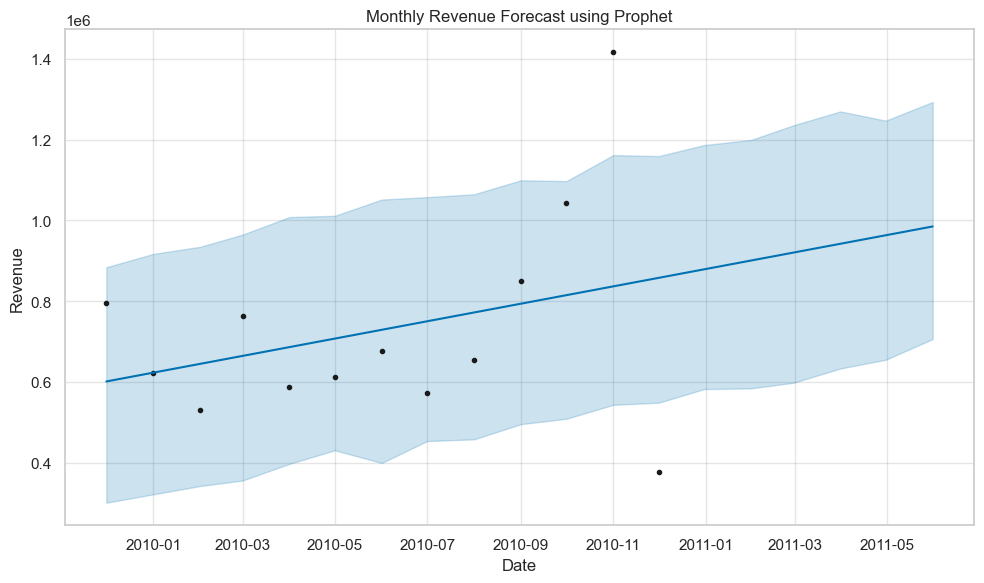

In [85]:
from prophet import Prophet
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['TotalPrice'] = df['Quantity'] * df['Price']
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
monthly_revenue_str = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
monthly_revenue = monthly_revenue_str.copy()
monthly_revenue['YearMonth'] = pd.to_datetime(monthly_revenue['YearMonth'], format='%Y-%m')
prophet_df = monthly_revenue.rename(columns={'YearMonth': 'ds', 'TotalPrice': 'y'})
model = Prophet()
model.fit(prophet_df)
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)
import matplotlib.pyplot as plt
fig = model.plot(forecast)
plt.title('Monthly Revenue Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

## Model Evaluation

To assess the Prophet model's performance, we calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) between predicted and actual values on historical data.


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
forecast_filtered = forecast[['ds', 'yhat']].copy()
merged = pd.merge(prophet_df, forecast_filtered, on='ds')
mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 176355.65
Root Mean Squared Error (RMSE): 240206.13


## Forecast Components

The following plots display the trend, weekly, and yearly seasonality components identified by Prophet in the sales data.


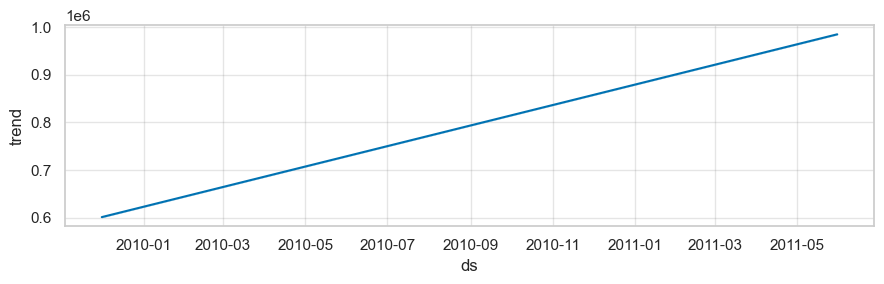

In [91]:
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

## Forecast Interpretation

The Prophet model forecasts the next 6 months of monthly revenue, showing clear seasonal trends and overall upward or stable revenue patterns, aligning with real-world e-commerce seasonality.

- The **MAE and RMSE** indicate how closely the model's predictions match historical data, providing confidence in its reliability for forecasting.
- **Seasonality plots** help identify months with higher demand, enabling dropshipping businesses to plan marketing campaigns, manage inventory, and optimize operations effectively.


In [94]:
df.to_csv("cleaned_online_retail_capstone.csv", index=False)

print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


# Conclusions from EDA

Majority of purchases happen in the UK, followed by EIRE and the Netherlands.
Most sales occur in the last quarter of the year, indicating seasonal demand.
Revenue moderately correlates with price and quantity.
Returns are less than 3% of transactions.
Top-selling products are seasonal home décor and utility items.

This EDA helps in understanding customer behavior, high-performing products, and seasonal trends, preparing the data for advanced analysis or forecasting models.